In statistics, polynomial regression is a form of regression analysis in which the relationship between the independent variable x and the dependent variable y is modelled as an nth degree polynomial in x.

<img src='pr.png'>

## Load packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Load data

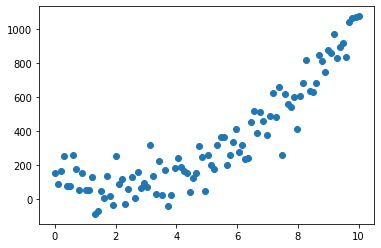

In [3]:
np.random.seed(42)
n_sample=100
x = np.linspace(0,10,n_sample)
c = np.random.randn(100)
y = x**3+c*100+100
plt.scatter(x,y)

In [42]:
# x

In [4]:
x.ndim

1

In [5]:
x

array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
        3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
        3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
        4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
        4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
        5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
        5.55555556,  5.65656566,  5.75757576,  5.85858586,  5.95959596,
        6.06060606,  6.16161616,  6.26262626,  6.36363636,  6.46464646,
        6.56565657,  6.66666667,  6.76767677,  6.86868687,  6.96

In [27]:
X = x.reshape(-1,1)
# X

### Linear Regression

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
lr = LinearRegression()
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
prediction = lr.predict(X)

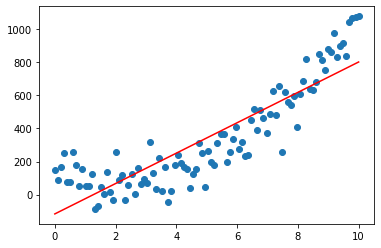

In [10]:
plt.scatter(X,y)
plt.plot(X,prediction,c="red")

In [11]:
from sklearn.metrics import r2_score

In [12]:
r2_score(y,prediction)

0.7643394574930141

In [14]:
X.shape

(100, 1)

* here Linear Regression is not able to well fitted all data points

### Polynomial Regression

In [13]:
from sklearn.preprocessing import PolynomialFeatures

In [50]:
poly_reg = PolynomialFeatures(degree=2)

In [43]:
poly_x = poly_reg.fit_transform(X)

In [44]:
poly_x.shape

(100, 4)

In [45]:
lr1 = LinearRegression()

In [46]:
lr1.fit(poly_x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
prediction2 = lr1.predict(poly_x)

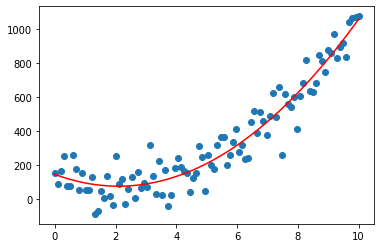

In [48]:
plt.scatter(x,y)
plt.plot(X,prediction2,c="red")

In [49]:
r2_score(y,prediction2)

0.9173875215431468

Hence , model score is improved after using Polynomial Regression

### Lets take another data...

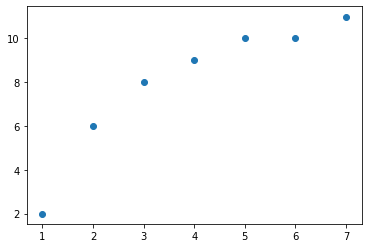

In [66]:
X = np.array([1,2,3,4,5,6,7]).reshape(-1,1)
Y =[2,6,8,9,10,10,11]
plt.scatter(X,Y)

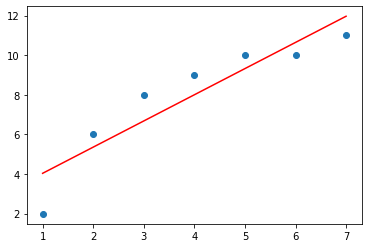

In [75]:
rg = LinearRegression()
rg.fit(X,Y)
p = rg.predict(X)
plt.scatter(X,Y)
plt.plot(X,p,c="red")

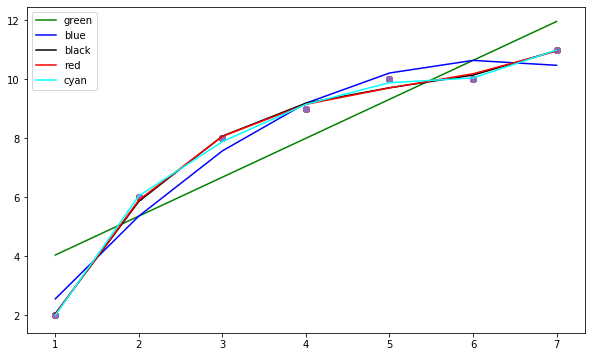

In [83]:
colors = ["red","green","blue","black","red","cyan"]
plt.figure(figsize=(10,6))
for i in range(1,6):
    px = PolynomialFeatures(degree=i)
    pxdata=px.fit_transform(X)
    rg = LinearRegression()
    rg.fit(pxdata,Y)
    pred=rg.predict(pxdata)
    plt.scatter(X,Y)
    plt.plot(X,pred,c=colors[i])
    plt.legend(colors[1:])